In [1]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


# Dataset

There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________


Randomly printing 10 images with labels from training dataset
index: 33256
Lable: 9


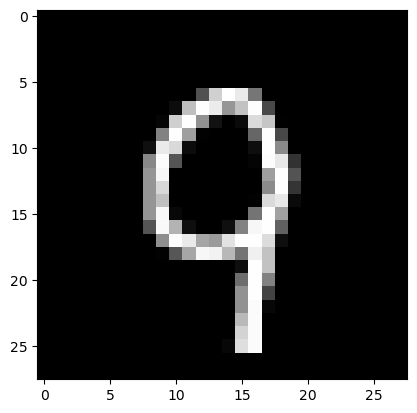

index: 8448
Lable: 9


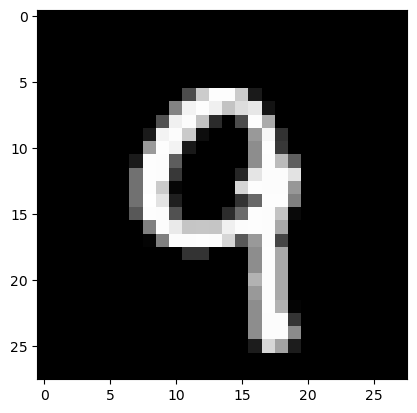

index: 1000
Lable: 0


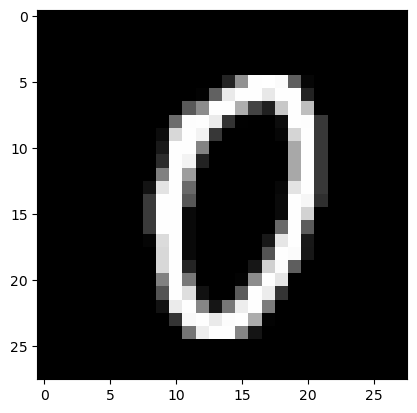

index: 10805
Lable: 2


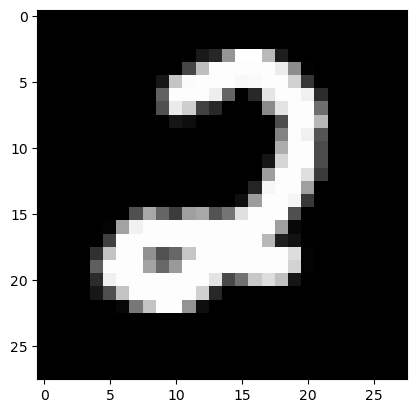

index: 32305
Lable: 6


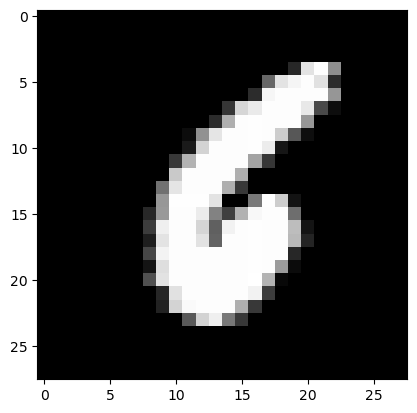

index: 52975
Lable: 2


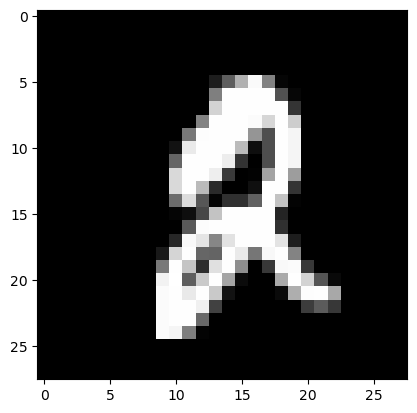

index: 1764
Lable: 4


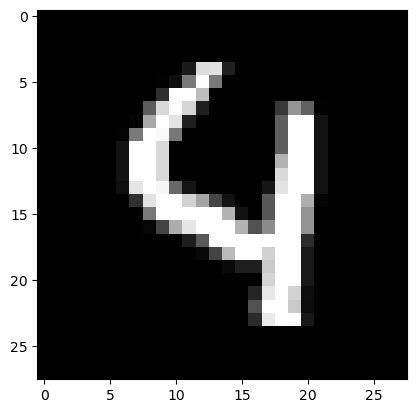

index: 3771
Lable: 1


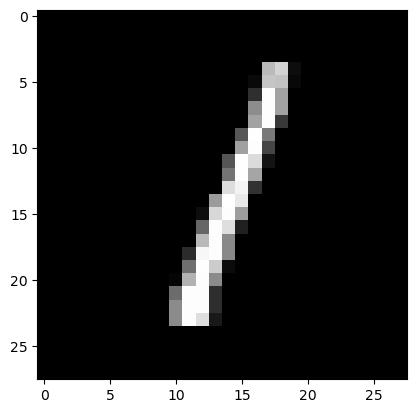

index: 34049
Lable: 6


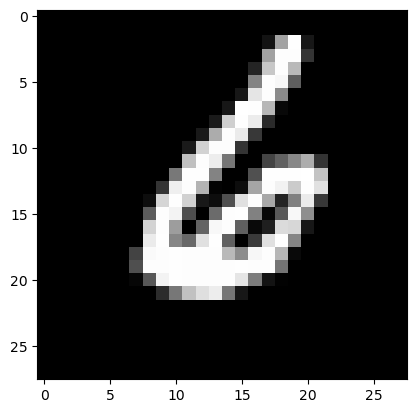

index: 51041
Lable: 0


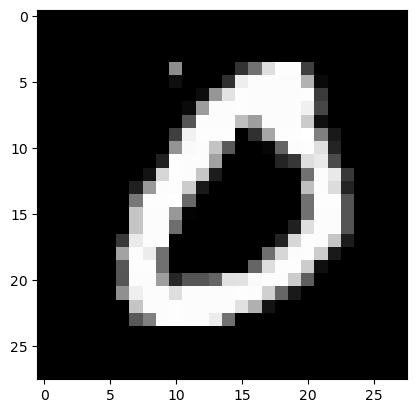

___________________


Randomly printing 10 images with labels from testing dataset
index: 50903
Lable: 7


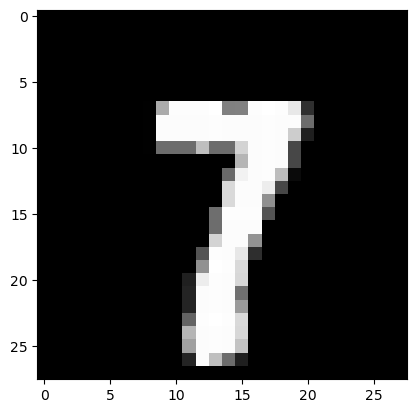

index: 14575
Lable: 1


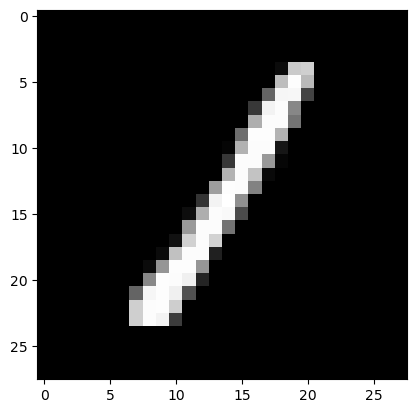

index: 20922
Lable: 5


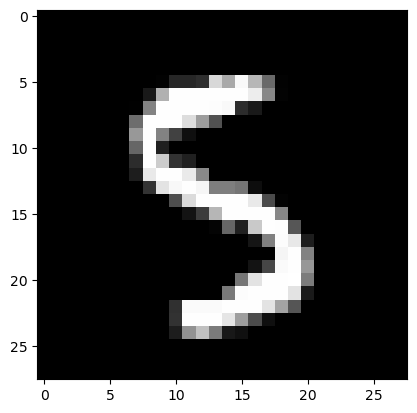

index: 28382
Lable: 6


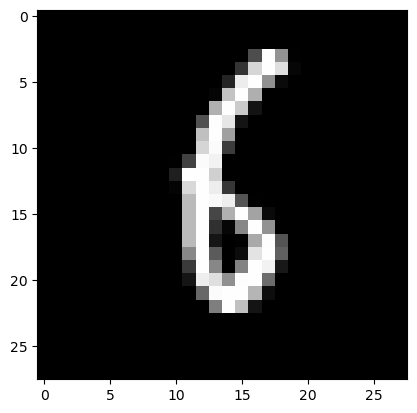

index: 5239
Lable: 1


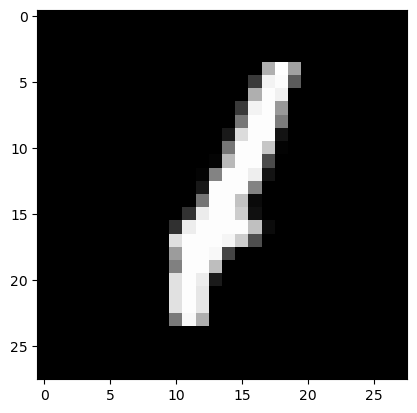

index: 27852
Lable: 2


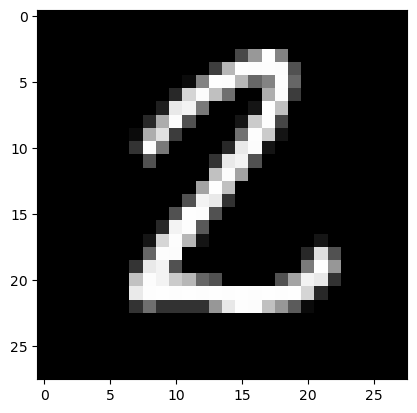

index: 17507
Lable: 2


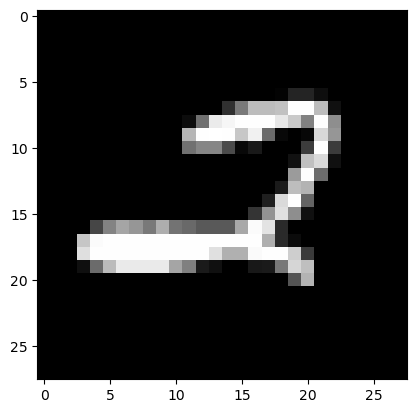

index: 4804
Lable: 0


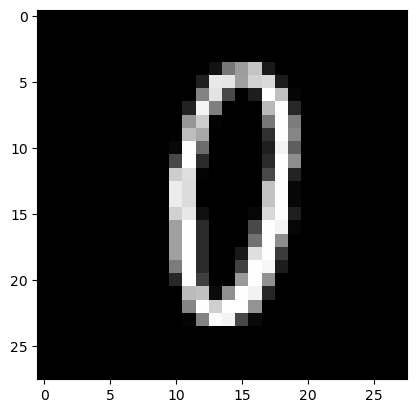

index: 41856
Lable: 0


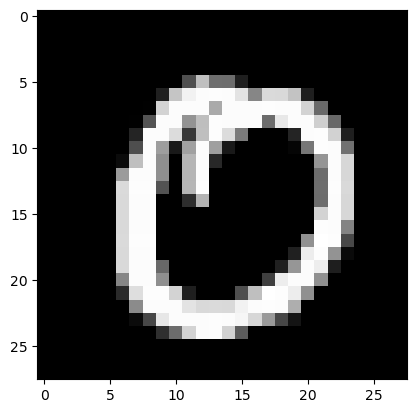

index: 24549
Lable: 9


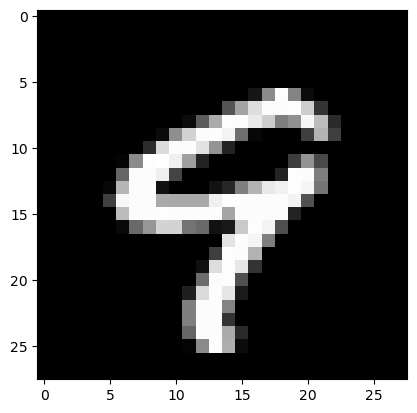

___________________


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [3]:
# Loading dataset
dataset = keras.datasets.mnist.load_data()

# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,

# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")
# Each image is of shape 28x28
# print(dataset[0][0][0].shape)
# print("___________________")


# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[1])
print("___________________\n\n")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")
print("___________________\n\n")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")





# Task

You have to reduce the size of this dataset by 10 times.

There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.

You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)

new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset.


In [5]:
# Your code here


# Load the dataset
(x_train, y_train), (x_test, y_test) = dataset

# Initialize the new dataset
new_x_train = []
new_y_train = []
new_x_test = []
new_y_test = []

# Loop through each label
for label in range(10):
    # Get the indices of the images with the current label in the training dataset
    indices_train = np.where(y_train == label)[0]
    # Randomly select 600 indices from the training dataset
    indices_train = np.random.choice(indices_train, size=600, replace=False)
    # Add the selected images and labels to the new dataset
    new_x_train.append(x_train[indices_train])
    new_y_train.append(y_train[indices_train])

    # Get the indices of the images with the current label in the testing dataset
    indices_test = np.where(y_test == label)[0]
    # Randomly select 100 indices from the testing dataset
    indices_test = np.random.choice(indices_test, size=100, replace=False)
    # Add the selected images and labels to the new dataset
    new_x_test.append(x_test[indices_test])
    new_y_test.append(y_test[indices_test])

# Concatenate the selected images and labels into numpy arrays
new_x_train = np.concatenate(new_x_train)
new_y_train = np.concatenate(new_y_train)
new_x_test = np.concatenate(new_x_test)
new_y_test = np.concatenate(new_y_test)


# Save the new dataset
new_dataset = (new_x_train, new_y_train), (new_x_test, new_y_test)


# Validation of Task

In [6]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")

(28, 28)
___________________


In [7]:
# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset

There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________




In [8]:
# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________




Randomly printing 10 images with labels from training dataset
index: 177
Lable: 0


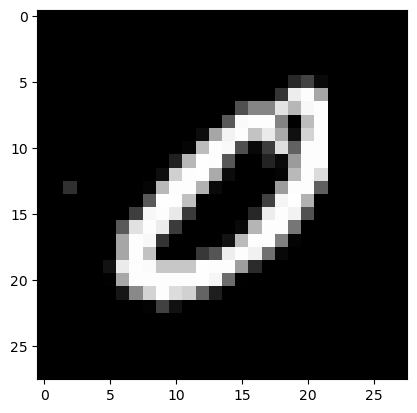

index: 1268
Lable: 2


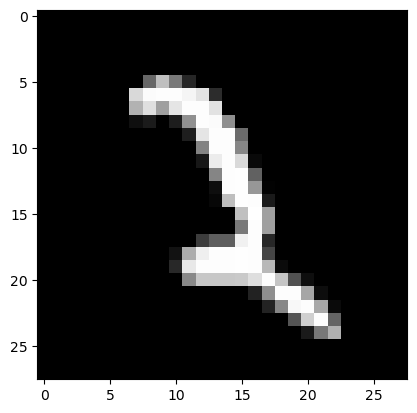

index: 582
Lable: 0


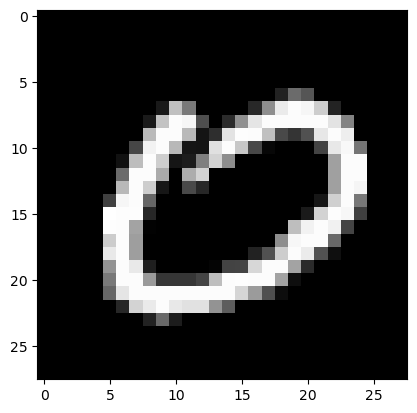

index: 4861
Lable: 8


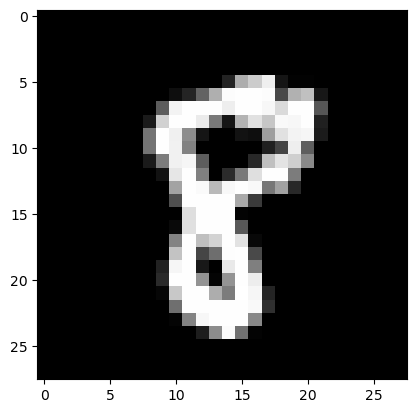

index: 2644
Lable: 4


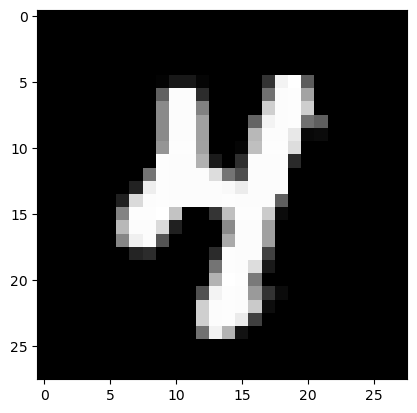

index: 2594
Lable: 4


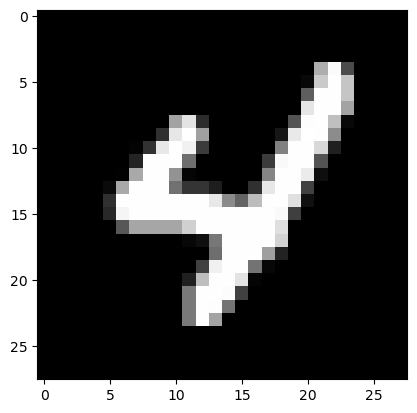

index: 551
Lable: 0


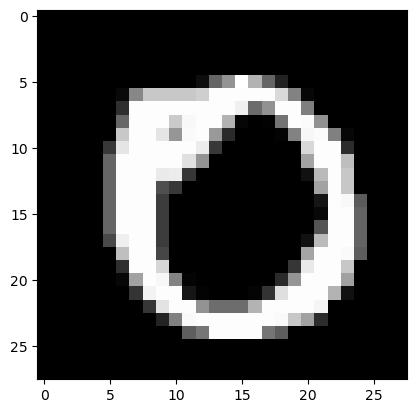

index: 4688
Lable: 7


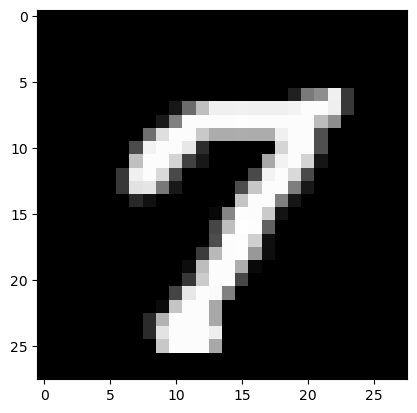

index: 349
Lable: 0


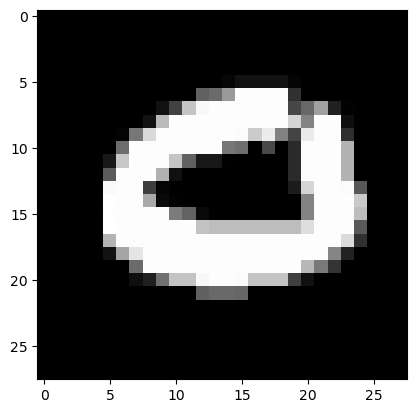

index: 3095
Lable: 5


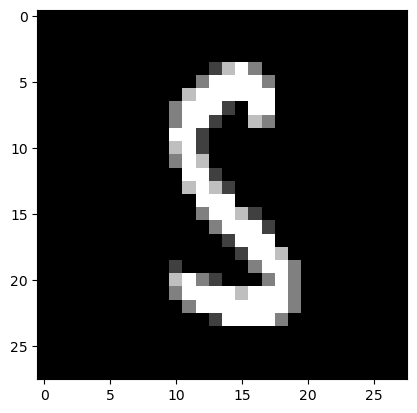

___________________


Randomly printing 10 images with labels from testing dataset
index: 2371
Lable: 3


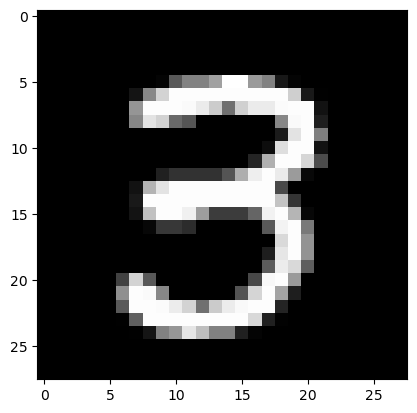

index: 5834
Lable: 9


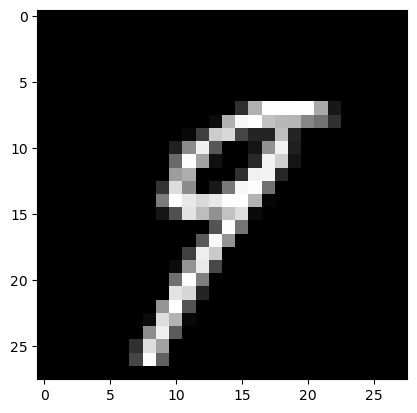

index: 1022
Lable: 1


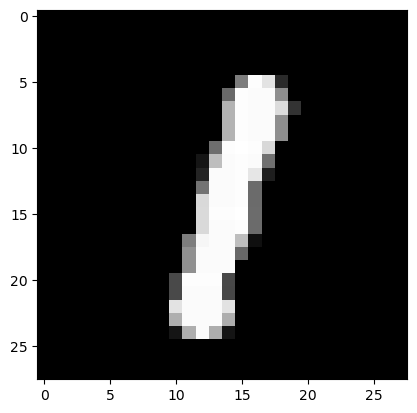

index: 776
Lable: 1


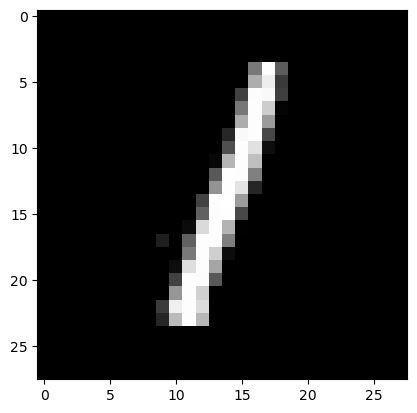

index: 332
Lable: 0


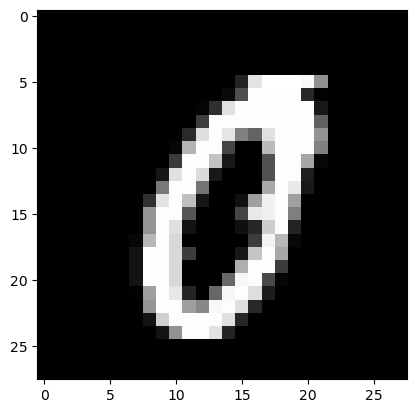

index: 4846
Lable: 8


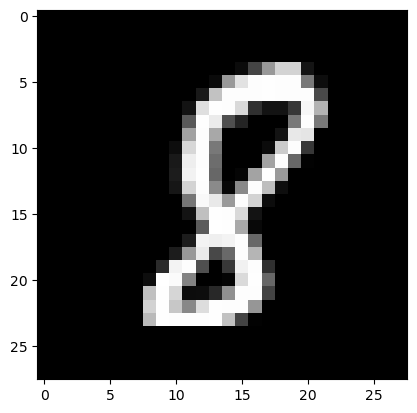

index: 1903
Lable: 3


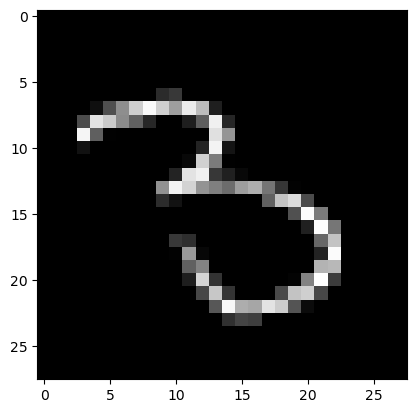

index: 102
Lable: 0


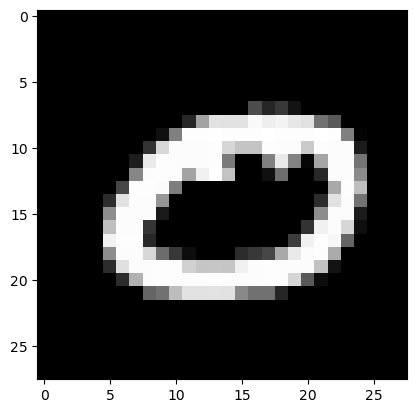

index: 4215
Lable: 7


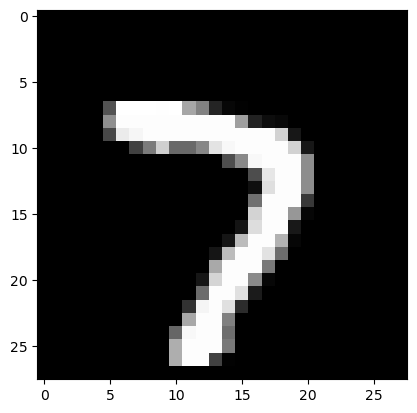

index: 5085
Lable: 8


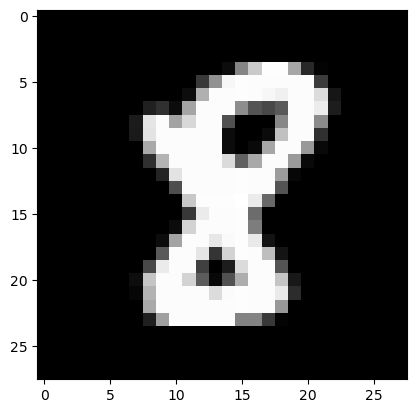

___________________




In [9]:
# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")


(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 590
Lable: 0


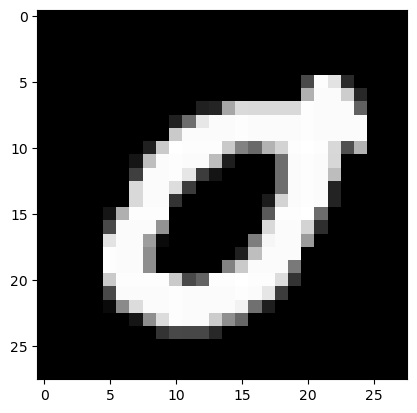

index: 3595
Lable: 5


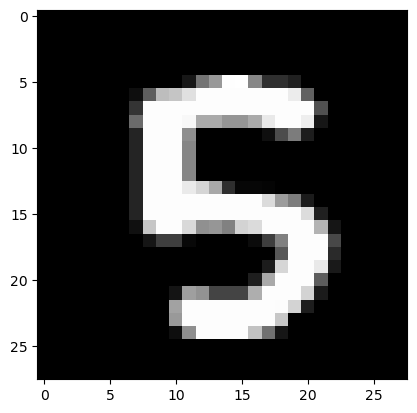

index: 4481
Lable: 7


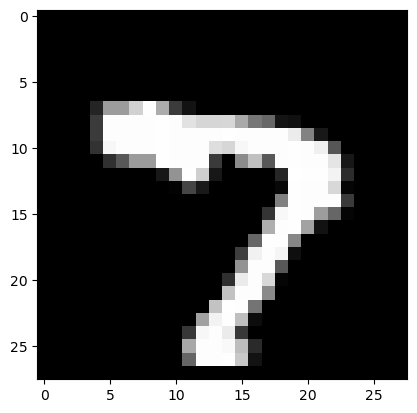

index: 1560
Lable: 2


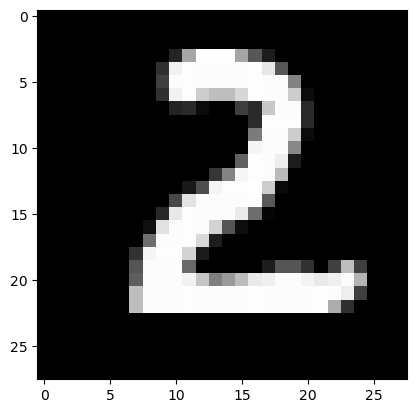

index: 1912
Lable: 3


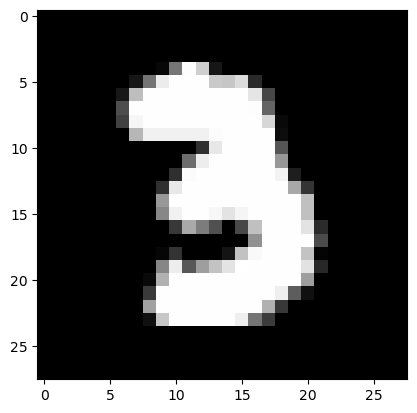

index: 4898
Lable: 8


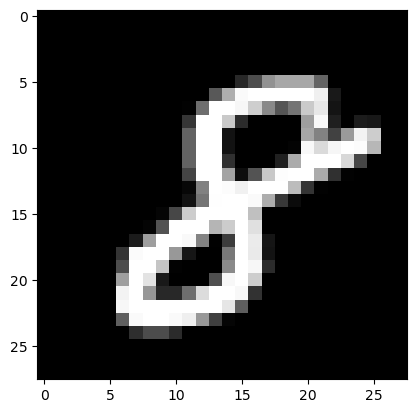

index: 5521
Lable: 9


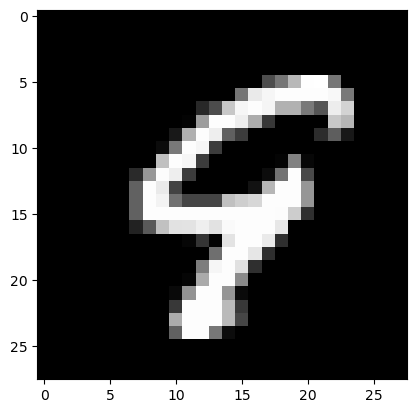

index: 751
Lable: 1


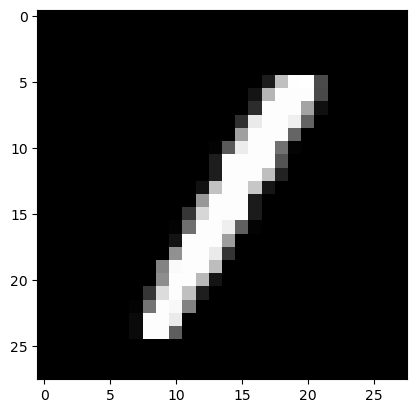

index: 1414
Lable: 2


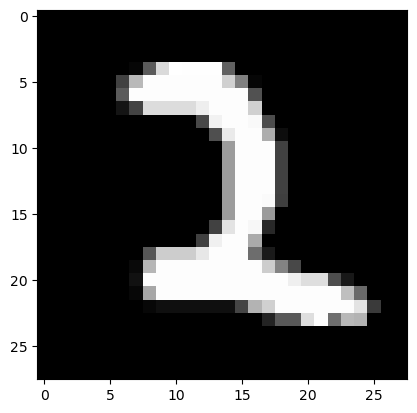

index: 2037
Lable: 3


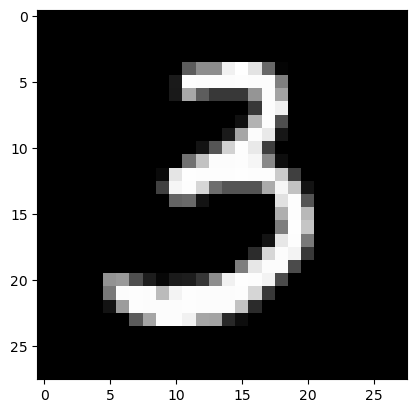

___________________


Randomly printing 10 images with labels from testing dataset
index: 4513
Lable: 7


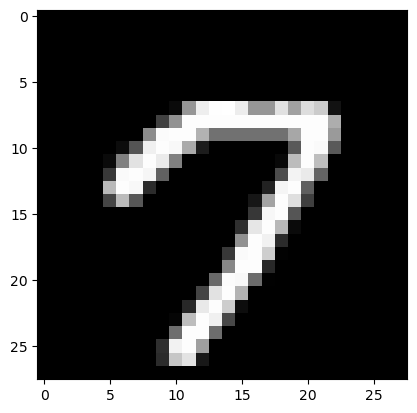

index: 184
Lable: 0


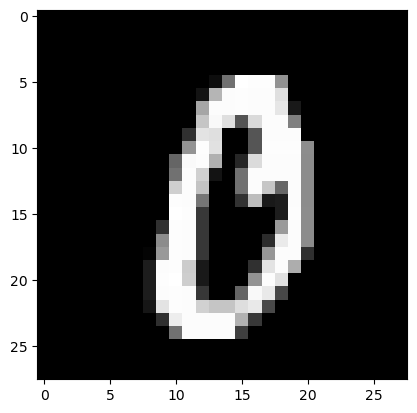

index: 979
Lable: 1


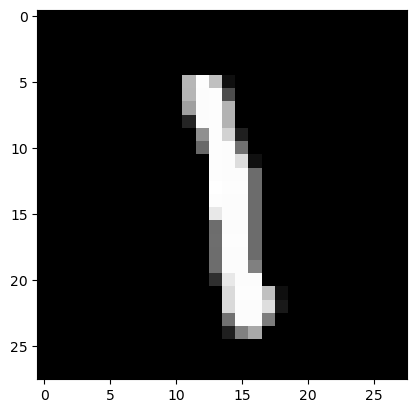

index: 3932
Lable: 6


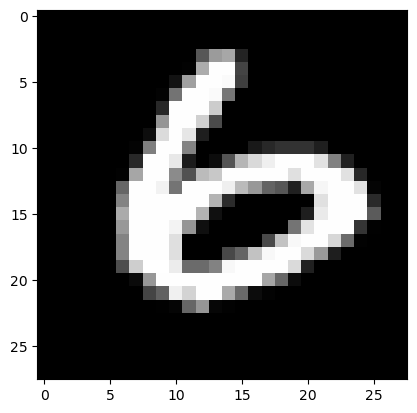

index: 157
Lable: 0


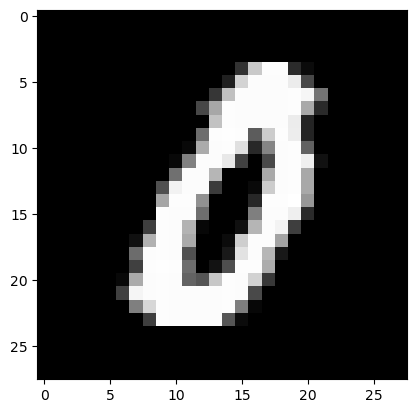

index: 1636
Lable: 2


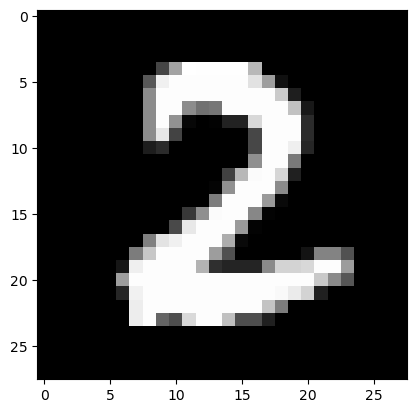

index: 919
Lable: 1


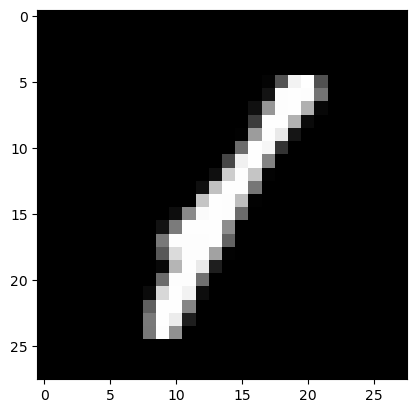

index: 5037
Lable: 8


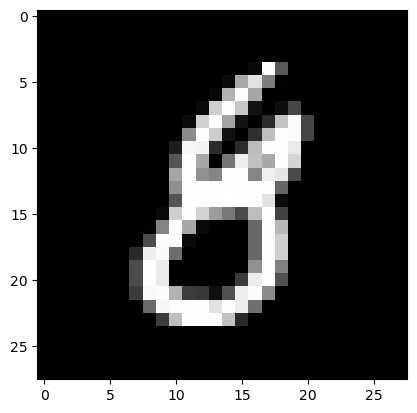

index: 3907
Lable: 6


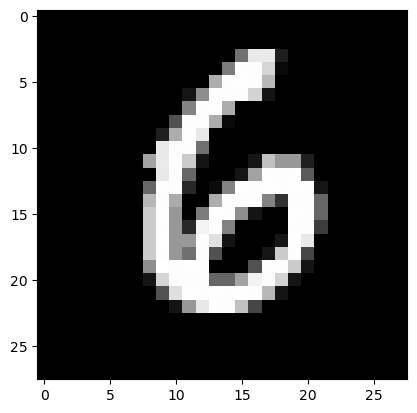

index: 2187
Lable: 3


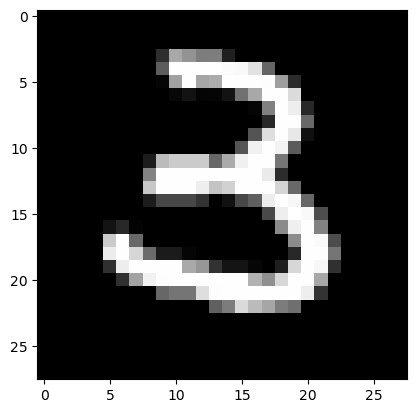

___________________




In [10]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")

